## Data Visualization

Import the necesssary libraries.

In [35]:
import pandas as pd
import numpy as np
import os
from lifelines import KaplanMeierFitter
import seaborn as sns


Read the CSV files and understand the structure. Please note that our CSV-s are generated randomly.

In [7]:
transaction_data = pd.read_csv('transactions_data.csv')
transaction_data.head()

,transaction_id,subscriber_id,transaction_date,transaction_amount,payment_method_id
0,0,52,2024-01-23 23:03:38.487755,57.09,2
1,1,64,2024-01-07 18:33:13.956054,323.56,3
2,2,14,2024-01-06 03:16:38.828161,454.14,3
3,3,12,2024-04-22 11:14:34.029086,410.09,4
4,4,11,2024-01-14 08:30:30.468659,463.98,5


In [39]:
rfm_segmentation_data = pd.read_csv('rfm_segmentation_data.csv')
rfm_segmentation_data.head()

,segment_id,subscriber_id,recency_score,frequency_score,monetary_score,segment_label
0,1,61,3.07,4.48,4.37,character
1,2,88,4.31,2.62,2.69,claim
2,3,98,3.63,4.81,4.30,town
3,4,58,1.98,3.12,3.40,tonight
4,5,51,1.98,2.71,1.95,different


In [9]:
subscribers_data = pd.read_csv('subscribers_data.csv')
subscribers_data.head()

,subscriber_id,name,email,age,gender,location,subscription_start_date,subscription_end_date,survival_time,event_observed
0,1,Keith Johnson,snydertammy@example.com,47,Male,New Adammouth,2020-11-08 08:36:46.818874,2029-03-24 06:32:10.856197,3057,False
1,2,Stacie Ross,littlejohn@example.com,54,Female,Millsside,2022-01-14 23:55:11.078871,2029-03-18 13:17:34.526762,2619,False
2,3,Tonya Gross,jason27@example.com,41,Other,South Troy,2020-05-08 23:58:48.644272,2024-12-05 07:54:35.846767,1671,True
3,4,Randall Williams,sullivansusan@example.com,49,Male,Michaeltown,2022-11-18 22:28:02.490442,2026-09-19 11:59:24.606350,1400,True
4,5,Brian King,dylan01@example.com,26,Male,Terriberg,2023-04-08 14:47:28.772063,2026-08-22 20:42:42.732118,1232,True


In [10]:
clv_data = pd.read_csv('clv_data.csv')
clv_data.head()

,clv_id,clv_value,clv_date,predicted_type,is_success,subscriber_id
0,1,7106.52,2024-04-24 10:58:22.971892,Optimistic,False,12
1,2,9956.70,2024-04-10 01:05:01.987361,Pessimistic,True,86
2,3,8331.03,2024-01-18 22:26:22.030265,Pessimistic,True,50
3,4,5697.36,2024-02-02 20:38:27.715173,Realistic,True,36
4,5,5084.45,2024-03-22 05:30:02.342173,Optimistic,False,56


In [11]:
activities_data = pd.read_csv('activities_data.csv')
activities_data.head()

,activity_id,subscriber_id,activity_type,activity_date_time
0,0,75,across,2024-03-20 19:37:56.115368
1,1,100,old,2024-03-22 22:47:51.869603
2,2,53,run,2024-01-21 08:24:48.696238
3,3,38,of,2024-03-13 10:55:52.877240
4,4,60,gun,2024-02-07 21:49:58.807315


In [12]:
payment_method_data = pd.read_csv('payment_methods_data.csv')
payment_method_data.head()

,payment_method_id,payment_name
0,1,Mastercard
1,2,Discover
2,3,JCB 16 digit
3,4,VISA 16 digit
4,5,VISA 13 digit


In [13]:
retrention_strategies_data = pd.read_csv('retention_strategies_data.csv')
retrention_strategies_data.head()

,strategy_id,segment_id,strategy_name,description,performance_metrics,status
0,1,72,Personal foot play.,Full choose growth charge music. Support hope ...,admit,Pending
1,2,72,Occur ahead.,Why feeling miss safe college participant bit....,look,Inactive
2,3,36,Field friend south.,Capital side sense since standard provide vari...,society,Active
3,4,21,Better challenge hotel around.,Trial media market child. Him make firm would ...,build,Inactive
4,5,79,Because month program.,Some their middle do quickly. Social job bette...,upon,Active


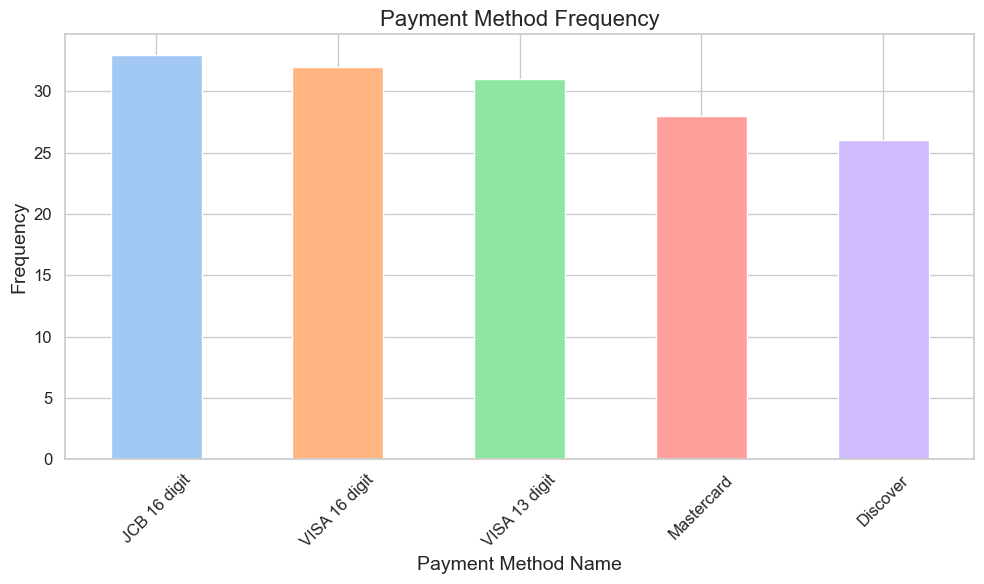

In [24]:
merged_data = pd.merge(transaction_data, payment_method_data, on='payment_method_id')
payment_method_freq = merged_data['payment_name'].value_counts()

sns.set(style="whitegrid")

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
payment_method_freq.plot(kind='bar', color=pastel_palette)
plt.title('Payment Method Frequency', fontsize=16)
plt.xlabel('Payment Method Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.xticks(range(len(payment_method_freq.index)), payment_method_freq.index)
plt.show()


We see that our customers mainly ise JCB 16 digit mainly. However, the data is small and the difference between VISA 16 digit and JCB 16 digit is very small.

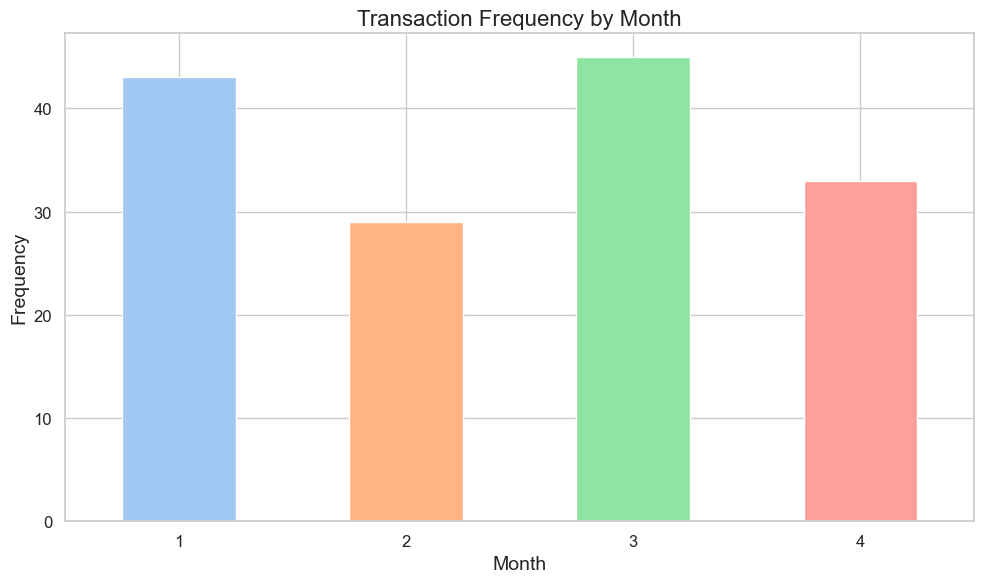

In [25]:
transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])
transaction_data['transaction_month'] = transaction_data['transaction_date'].dt.month
transaction_month_freq = transaction_data['transaction_month'].value_counts().sort_index()

sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
transaction_month_freq.plot(kind='bar', color=pastel_palette)
plt.title('Transaction Frequency by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()


Our generated data includes transactions from thr 4 months of 2024. We see that our customers have made the most transactions during the 2rd month which corresponds to March.

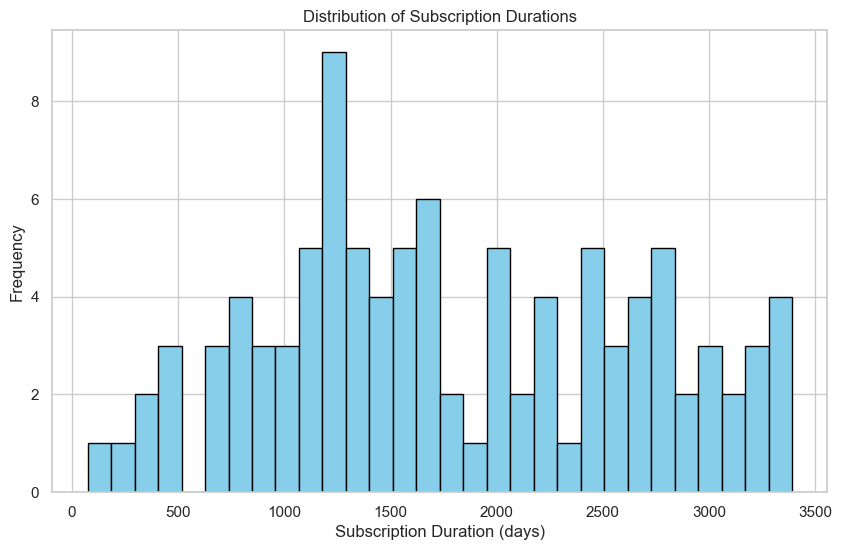

In [26]:
subscribers_data['subscription_start_date'] = pd.to_datetime(subscribers_data['subscription_start_date'])
subscribers_data['subscription_end_date'] = pd.to_datetime(subscribers_data['subscription_end_date'])
subscribers_data['subscription_duration'] = (subscribers_data['subscription_end_date'] - subscribers_data['subscription_start_date']).dt.days
plt.figure(figsize=(10, 6))
plt.hist(subscribers_data['subscription_duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscription Durations')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Here is the plot tu understand how much our customers have been with us. This is the statistics by days. Let's create statistics by moths to understand the pattern better.

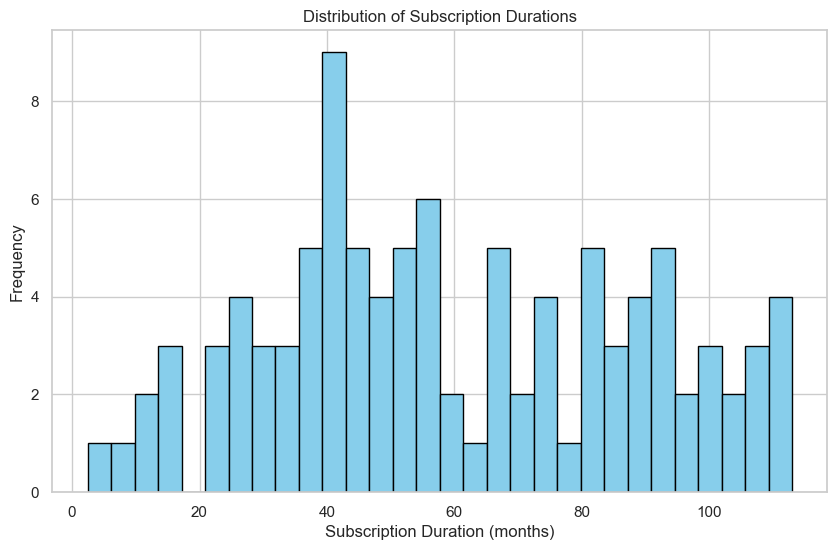

In [28]:
subscribers_data['subscription_start_date'] = pd.to_datetime(subscribers_data['subscription_start_date'])
subscribers_data['subscription_end_date'] = pd.to_datetime(subscribers_data['subscription_end_date'])

subscribers_data['subscription_duration'] = ((subscribers_data['subscription_end_date'] - subscribers_data['subscription_start_date']).dt.days) / 30

plt.figure(figsize=(10, 6))
plt.hist(subscribers_data['subscription_duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscription Durations')
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


We see that our random customers are quite loyal. The most repeated pattern of months is around 40 months which is more than 3 years.

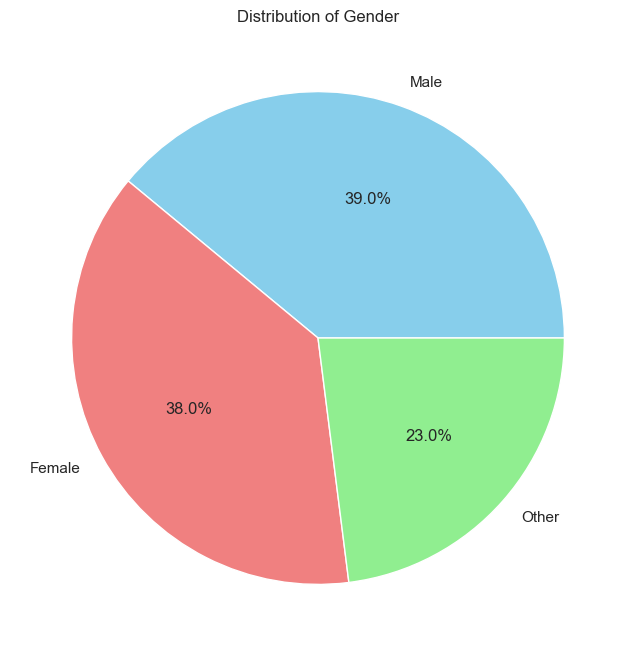

In [31]:
gender_counts = subscribers_data['gender'].value_counts()

custom_colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribution of Gender')
plt.show()


Let's understand the gender distribution. We see that the proportion of males and females is almost equal. We added "other" option as well and the randomly generated data has given 23 percent of other.

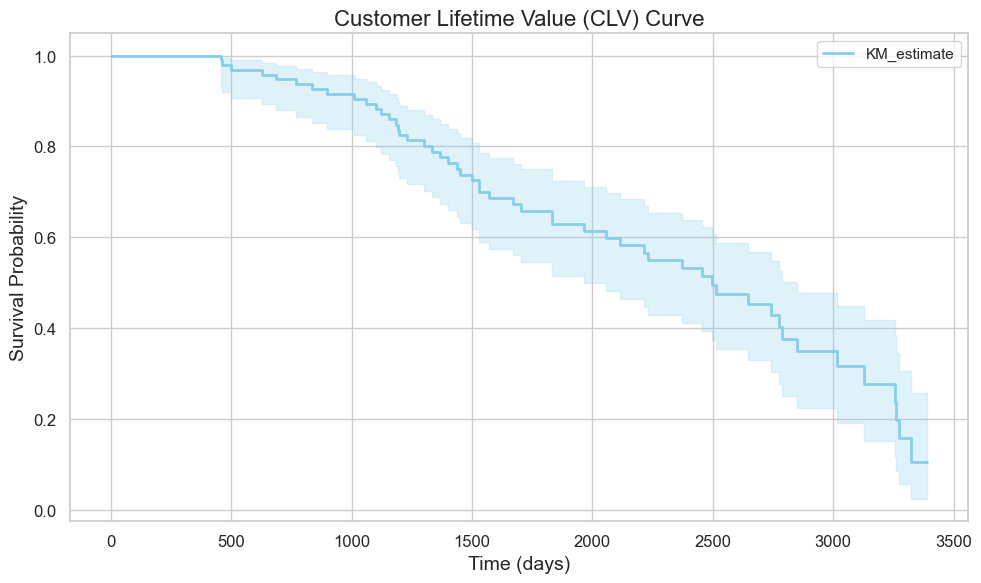

In [36]:
kmf = KaplanMeierFitter()
kmf.fit(subscribers_data['survival_time'], event_observed=subscribers_data['event_observed'])

plt.figure(figsize=(10, 6))
kmf.plot(color='skyblue', linewidth=2)
plt.title('Customer Lifetime Value (CLV) Curve', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

In [50]:
recency_weight = 0.25
frequency_weight = 0.25
monetary_weight = 0.5

rfm_segmentation_data['rfm_final'] = (
    rfm_segmentation_data['monetary_score'] * monetary_weight +
    rfm_segmentation_data['frequency_score'] * frequency_weight +
    rfm_segmentation_data['recency_score'] * recency_weight
)

rfm_segmentation_data.head()


,segment_id,subscriber_id,recency_score,frequency_score,monetary_score,segment_label,rfm_final,category
0,1,61,3.07,4.48,4.37,character,4.0725,Loyalists
1,2,88,4.31,2.62,2.69,claim,3.0775,Loyalists
2,3,98,3.63,4.81,4.30,town,4.2600,Loyalists
3,4,58,1.98,3.12,3.40,tonight,2.9750,Loyalists
4,5,51,1.98,2.71,1.95,different,2.1475,Loyalists


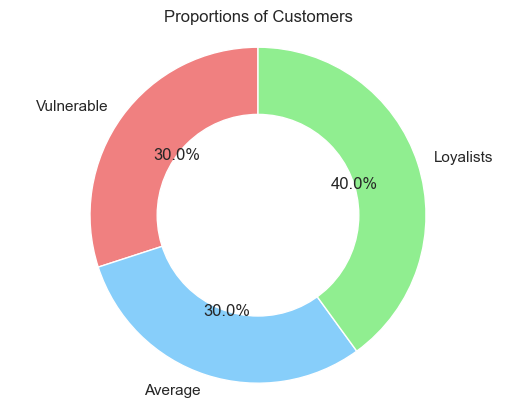

In [49]:
import matplotlib.pyplot as plt

# Define the proportions of customers in each category
proportions = {
    'Vulnerable': 1.5,
    'Average': 3.0 - 1.5,
    'Loyalists': 5.0 - 3.0
}

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a donut chart
ax.pie(proportions.values(), labels=proportions.keys(), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle in the middle to create a donut chart
circle = plt.Circle((0,0),0.6,fc='white')
ax.add_artist(circle)

# Display the plot
plt.title('Proportions of Customers')
plt.show()


This is done manually by giving weighted averages and labeling them according to the rfm final scores.

Please note that the numbers are chosen randomly. In real life of course loyalists would not be this much. We have also a lot of vulnerable customers and strategies should be implemented to move them to the segment "average".